In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from scipy.stats import binom, chi2, poisson, ttest_ind, fisher_exact, hypergeom

## Problem 1.1

### Problem 1.1.2

In [52]:
# NFIP
polio_rate_vaccine = 25/100000
polio_rate_con = 54/100000
size_vaccine = 225000
size_con = 725000
polio_vaccine = np.round(size_vaccine*polio_rate_vaccine)
polio_con = np.round(size_con*polio_rate_con)

null = binom(size_con, polio_rate_con)
print('p-value=',null.cdf(725000*25/100000))

## Fisher Exact test
_,p_f_NFIP=fisher_exact([[size_vaccine*polio_rate_vaccine, size_con*polio_rate_con],
                        [size_vaccine-(size_vaccine*polio_rate_vaccine), size_con-(size_con*polio_rate_con)]],
                        alternative='less')
print('p-value_fisher_exact=', p_f_NFIP)

## Likelihood Ratio Test, binom.pmf(obsevations, size, p)
total = size_vaccine+size_con
total_polio = polio_vaccine+polio_con
null_p = total_polio/total

t_statistic_NFIP_mle = -2*np.log(binom.pmf(polio_vaccine, total, null_p)* binom.pmf(polio_con, total, null_p)
                                /(binom.pmf(polio_vaccine, size_vaccine, polio_rate_vaccine)*
                                  binom.pmf(polio_con, size_con, polio_rate_con)))

df = 1  # degree of freedom = (2-1)
Lambda_x_dis = chi2(df)
print('p-value_Likelihood_Ratio=',1-Lambda_x_dis.cdf(t_statistic_NFIP_mle))

p-value= 8.9519739684691e-33
p-value_fisher_exact= 2.1563683200354637e-09
p-value_Likelihood_Ratio= 0.0


In [53]:
# RCT
polio_tr = 200000 *28/100000
polio_co = 200000 *71/100000
print(polio_tr, polio_co, polio_tr+polio_co)

## Fisher Exact test
_,p_f_rct=fisher_exact([[polio_tr, polio_co],
                        [200000-polio_tr, 200000-polio_co]],
                        alternative='less')
t_distribution = hypergeom(400000, 200000 , 198)
print('p-value_fisher_exact =',t_distribution.cdf(polio_tr), p_f_rct)
print(t_distribution.cdf(polio_tr)<=0.05)

## Likelihood Ratio test
t_statistic_rct_mle = -2*np.log(binom.pmf(polio_tr, 400000, 198/400000)* binom.pmf(polio_co, 400000, 198/400000)
                                /(binom.pmf(polio_tr, 200000, 28/100000)*
                                  binom.pmf(polio_co, 200000, 71/100000)))

df = 1  # degree of freedom = (2-1)
Lambda_x_dis = chi2(df)

print('p-value_Likelihood_Ratio=',1-Lambda_x_dis.cdf(t_statistic_rct_mle))

56.0 142.0 198.0
p-value_fisher_exact = 4.151382059413265e-10 4.1513820598972516e-10
True
p-value_Likelihood_Ratio= 0.0


### Problem 1.1.4

In [77]:
# NFID no-consent groups vs control group.
polio_rate_con = 54/100000
size_con = 725000
polio_rate_no = 44/100000
size_no = 125000
_,p_f_NFIP_no_con =fisher_exact([[size_no*polio_rate_no, size_con*polio_rate_con],
                        [size_no-(size_no*polio_rate_no), size_con-(size_con*polio_rate_con)]],
                        alternative='two-sided')
print(p_f_NFIP_no_con)

t_distribution = hypergeom(850000, 125000 , size_no*polio_rate_no+size_con*polio_rate_con)
print(t_distribution.cdf(size_no*polio_rate_no))

0.180638003345807
0.0848737501198488


In [75]:
t_distribution = hypergeom(850000, 125000 , 447)
print(t_distribution.cdf(size_no*polio_rate_no))

0.08340936878768138


In [79]:
125000/(125000 + 225000), 350000/(350000+400000)

(0.35714285714285715, 0.4666666666666667)

##  Problem 1.2
- The file gamma-ray.csv contains a small quantity of data collected from the Compton Gamma Ray Observatory, a satellite launched by NASA in 1991 (http://cossc.gsfc.nasa.gov/). 
    - For each of 100 sequential time intervals of variable lengths (given in seconds), the number of gamma rays originating in a particular area of the sky was recorded. You would like to check the assumption that the emission rate is constant.

In [2]:
# load data
gamma_ray = pd.read_csv('./data_and_materials/gamma-ray.csv')
gamma_ray=gamma_ray.sort_values(by=['seconds'])
gamma_ray.describe()

,seconds,count
count,100.000000,100.000000
mean,157.182000,0.610000
std,251.579574,1.246368
min,12.500000,0.000000
25%,52.250000,0.000000
50%,100.350000,0.000000
75%,110.250000,1.000000
max,1350.000000,7.000000


In [3]:
# Part (d)
## null hypothesis = emission rate is constant = average emission rate observed = rate_bar
## What is(are) the most plausible parameter value(s) for the null model given the observations?
### ANS
### poission take counts, but since the time interval is different,
### null_poission_i = poission("time interval"_i * average emission rate)
rate_bar = np.sum(gamma_ray['count'])/np.sum(gamma_ray['seconds'])
print(f'Part (d): average emission rate observed = {rate_bar}')

Part (d): average emission rate observed = 0.0038808514969907496


In [4]:
# Part (e)
## alternative hypothesis = rate_i != rate_j for rate_i, rate_j in dataset
## What is(are) the most plausible parameter value(s) for the alternative model given the observations?
### ANS
### alt_poission_i = poission("time interval"_i * "rate_i") = poission("count"_i)
alt_rate = gamma_ray['rate'] = gamma_ray['count']/gamma_ray['seconds']

In [68]:
# from scipy.stats import poisson, chi2 #problem 1.2
# Part (f-1)
##  Which one of the following is a good test statistic for the data?
### Λ(𝑥) = -2*log(ML_null/ML_alt)
###      = -2*log(Pi(null_poission_i.pmf(count_i)/Pi(alt_poission_i.pmf(count_i)))
# Part (f-2)
## The asymptotic distribution for  Λ(𝑥)  is
### Lambda_x_dis
df = 99  # degree of freedom = (100-1)
Lambda_x_dis = chi2(df)
# Part (f-3) 
## Determine the rejection region at a significance level of  0.05
print(f'Part (f-3): rejection region = Lambda(x)>={Lambda_x_dis.ppf(0.95)}')
# Part (f-4)
## Given the observed data, the value of the test statistic is? Its p-value is?
ML_null=1
ML_alt=1
for i in range(100):
    ML_null *= poisson.pmf(gamma_ray['count'][i], rate_bar*gamma_ray['seconds'][i])
    ML_alt  *= poisson.pmf(gamma_ray['count'][i], gamma_ray['count'][i])
    
test_statistic = -2*np.log(ML_null / ML_alt)
p_value = 1-Lambda_x_dis.cdf(test_statistic)
print(f'Part (f-4): test_statistic = {test_statistic}, p_value = {p_value}')

Part (f-3): rejection region = Lambda(x)>=123.2252214533618
Part (f-4): test_statistic = 104.39792133021314, p_value = 0.33576662402509894


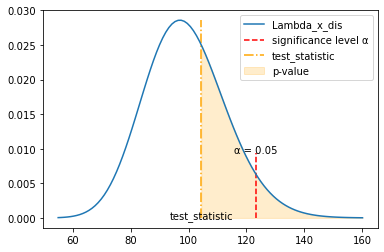

In [70]:
# visualization
## asymptotic distribution for Λ(𝑥)
x = np.linspace(Lambda_x_dis.ppf(0.0001), Lambda_x_dis.ppf(0.9999), 100)
y = Lambda_x_dis.pdf(x)
sns.lineplot(x=x, y=y, label='Lambda_x_dis')
## significance level=0.05
plt.vlines(x=Lambda_x_dis.ppf(0.95), ymin=0, ymax=np.mean(y), color='red', linestyle='--', label='significance level \u03B1')
plt.text(x=Lambda_x_dis.ppf(0.95), y=np.mean(y),s='\u03B1 = 0.05', ha='center')
## test_statistic
plt.vlines(x=test_statistic, ymin=0, ymax=np.max(y), color='orange', linestyle='-.', label='test_statistic')
plt.text(x=test_statistic, y=0, s='test_statistic', ha='center')
## p-value
px=np.linspace(test_statistic, Lambda_x_dis.ppf(0.9999), 100)
py=Lambda_x_dis.pdf(px)
plt.fill_between(x=px, y1=py, alpha=0.2, color='orange', label='p-value')
plt.legend()
plt.show()

## Problem 1.4
- Source of data: Golub et al. (1999). Molecular classification of cancer: class discovery and class prediction by gene expression monitoring, Science, Vol. 286:531-537.

- The data set golub consists of the expression levels of 3051 genes for 38 tumor mRNA samples. Each tumor mRNA sample comes from one patient (i.e. 38 patients total), and 27 of these tumor samples correspond to acute lymphoblastic leukemia (ALL) and the remaining 11 to acute myeloid leukemia (AML).

- You will need to discover ***how many genes can be used to differentiate the tumor types*** (meaning that their expression level differs between the two tumor types) using
   - the uncorrected p-values,
   - the Holm-Bonferroni correction,
   - the Benjamini-Hochberg correction

Feel free to use libraries for multiple hypothesis testing in R or python.

In [7]:
# load data
golub_data = pd.read_csv("./data_and_materials/golub_data/golub.csv", index_col=0).T
golub_classnames = pd.read_csv("data_and_materials/golub_data/golub_cl.csv")
golub_classnames.columns = ['V_x', 'tumor_type']
print(f'((samples) X (expression levels of genes)) = {golub_data.shape}')
print(f'(samples X tumor_types) = {golub_classnames.shape}')
print(golub_classnames.tumor_type.value_counts())
print('tumor_type 0=ALL, 1=AML')

((samples) X (expression levels of genes)) = (38, 3051)
(samples X tumor_types) = (38, 2)
0    27
1    11
Name: tumor_type, dtype: int64
tumor_type 0=ALL, 1=AML


In [8]:
ALL_data = golub_data[:27].copy()
ALL_Vx = golub_classnames[golub_classnames.tumor_type==0].copy()
AML_data = golub_data[27:].copy()
AML_Vx = golub_classnames[golub_classnames.tumor_type==1].copy()
print(ALL_data.shape, AML_data.shape)

(27, 3051) (11, 3051)


### null and alternative
- ***how many genes can be used to differentiate the tumor types***
    - 有多少個基因不是從同一個distribution 中出來的
       1. 找出 各基因的 test_statistic
           - according part-a, use Welch test_statistic
           - $t_{Welch,i}=\frac{  \bar{X}_{ALL,i} - \bar{X}_{AML,i} } {\sqrt{ \frac{s^{2}_{ALL,i}}{N_{ALL}} +  \frac{s^{2}_{AML,i}}{N_{AML}} }}$
               - where
                   - $\bar{X}_{ALL,i}$, $\bar{X}_{AML,i}$ : mean({X}_{ALL,i}), mean({X}_{AML,i})
                   - ${N_{ALL}$, ${N_{AML}$ : number of samples in ALL and AML
                   - $s^{2}_{ALL,i}$, $s^{2}_{AML,i}$ : sample variance for gene_i in ALL and AML
       2. test_statistic 分佈 
       3. $\alpha$ <= 0.05
       4. 各基因的 test_statistic 的 p-value <= 0.05?

In [9]:
# from scipy.stats import ttest_ind # problem 1.4
alpha=0.05
W_statistics = []
W_pvalues = []
for i in range(1,3052):
    W_stats , W_p = ttest_ind(ALL_data[i],AML_data[i], equal_var = False)
    W_statistics.append(W_stats)
    W_pvalues.append(W_p)

W_statistics = np.array(W_statistics)
W_pvalues = np.array(W_pvalues)

In [10]:
# Part (a)
## How many genes are significant using uncorrected p-values?
if_significant_unc = W_pvalues<=alpha
significant_number_unc = np.sum(if_significant_unc)
print(f'significant number using uncorrected p-values= {significant_number_unc}')

significant number using uncorrected p-values= 1078


In [11]:
# Part (b)
W_pvalues_sort = np.sort(W_pvalues)
## How many genes are significant according to the Holm-Bonferroni corrected p-values?
if_significant_HB = ((len(W_pvalues_sort) - np.arange(len(W_pvalues_sort))) * W_pvalues_sort) <= alpha
min_not_reject_point_HB = np.where(if_significant_HB==0)[0][0] # first a[n]==false, not reject all after n (ie. [n:])
print(f'significant number using Holm-Bonferroni corrected p-values= {min_not_reject_point_HB}') # all(a[:n]==True), len(a[:n]) == n

## How many genes are significant according to the Benjamini-Hochberg corrected p-va lues?
if_significant_BH = len(W_pvalues_sort)/np.arange(1,len(W_pvalues_sort)+1)*W_pvalues_sort <= alpha
max_reject_point_BH = np.where(if_significant_BH==1)[0].max() # biggest n s.t. a[n]==True, reject all before
print(f'significant number using Benjamini-Hochberg corrected p-values= {max_reject_point_BH+1}') # len([0,...,n])=n+1

significant number using Holm-Bonferroni corrected p-values= 103
significant number using Benjamini-Hochberg corrected p-values= 695


In [12]:
if_significant_BH = len(W_pvalues_sort)/np.arange(1,len(W_pvalues_sort)+1)*W_pvalues_sort <= alpha

In [13]:
len(W_pvalues_sort)*W_pvalues_sort/np.arange(1,len(W_pvalues_sort)+1)

array([8.48474310e-09, 2.34441674e-06, 8.56688139e-06, ...,
       9.99201807e-01, 1.00010173e+00, 9.99839873e-01])

In [14]:
len(np.where(if_significant_BH==1)[0])

695

## Problem 1.6


In [15]:
# load data
syn_X = pd.read_csv('./data_and_materials/syn_X.csv', header=None)
syn_y = pd.read_csv('./data_and_materials/syn_y.csv', header=None)
def add_intercept(X):
    return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)
X = add_intercept(np.array(syn_X))
syn_y = np.array(syn_y)
print(X.shape, syn_y.shape)

(100, 3) (100, 1)


In [16]:
# Part (a), Part (b)
## compute OLS estimator
OLS_estimator=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T),syn_y)
print(f'OLS_estimator={OLS_estimator}')

OLS_estimator=[[ 1.92960603]
 [ 1.26397096]
 [-4.59799331]]


In [19]:
#Part (c)
## Implement gradient descent for the *least squares problem*
## gradient_descent(X, y, step_size, precision)
## What is the optimal step size that you find? 
### ans
def square_error(X, weights, label):
    residual = label-np.dot(X,weights)
    error = np.dot(residual.T,residual) 
    return error.squeeze()

def partial_square_error_partial_w(X, weights, label):
    return (-2*np.dot(label.T,X) + 2*np.dot(np.dot(weights.T, X.T), X)).T


def train_model(X, label, step_size, precision, iterations=1000):
    # init weights
    weights = np.zeros((X.shape[1],1))
    
    for it in range(iterations):
        last_error = square_error(X, weights, label)
        weights -= step_size*partial_square_error_partial_w(X, weights,label)
        current_error = square_error(X, weights, label)
        if last_error-current_error < precision:
            print(f'step_size = {step_size}, end iterations = {it}, error = {current_error}')
            return weights, it, current_error
    print(f'step_size = {step_size}, end iterations = {it}, error = {current_error}')
    return weights, it, current_error
    


In [20]:
### start training
precision = 1e-30
it_champ=1000
step_size_champ=0
error_champ=1000

for step_size in np.linspace(0.001, 0.01, 100):
    _, it, min_error = train_model(X, syn_y, step_size, precision, iterations=1000)
    if np.round(min_error,7) <= error_champ:
        error_champ = min_error
        if it<it_champ:
            it_champ = it
            step_size_champ = step_size
print(f'best step_size = {step_size_champ}, in {it_champ} iterations, predict error = {error_champ}')

best step_size = 0.0042727272727272735, in 14 iterations, predict error = 24.163544118866874


### Part (d)
- contribution of air pollution to mortality. 

In [21]:
# load data
df_M = pd.read_csv('./data_and_materials/mortality.csv')
label_Mortality_df = pd.DataFrame(df_M.pop('Mortality'))
index_City =  pd.DataFrame(df_M.pop('City'))
## check order
## intercept, JanTemp, JulyTemp, RelHum, Rain, Educ, Dens, NonWhite, WhiteCollar, Pop, House, Income, HC, NOx, SO2
(df_M.columns ==\
['JanTemp', 'JulyTemp', 'RelHum', 'Rain', 'Educ', 'Dens', 'NonWhite', 'WhiteCollar', 'Pop', 'House', 'Income', 'HC', 'NOx', 'SO2']).all()

True

In [22]:
# X_o = add_intercept(np.array(df_M))
# precision = 1e-6
# it_champ=1000
# error_champ=10000000
# step_size_champ=None
# weights_champ=None
# for step_size in np.linspace(0.001, 0.01, 100):
#     weights, it, min_error = train_model(X_o, label_M, step_size, precision, iterations=1000)
#     if np.round(min_error,7) <= error_champ:
#         error_champ = min_error
#         weights_champ = weights
#         if it<it_champ:
#             it_champ = it
#             step_size_champ = step_size
# print(f'best step_size = {step_size_champ}, in {it_champ} iterations, predict error = {error_champ}')

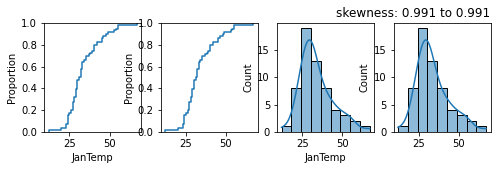

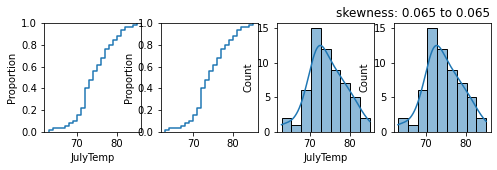

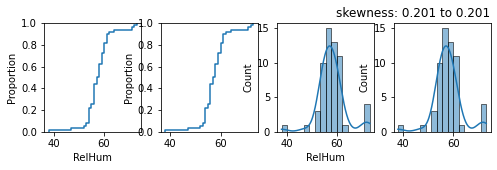

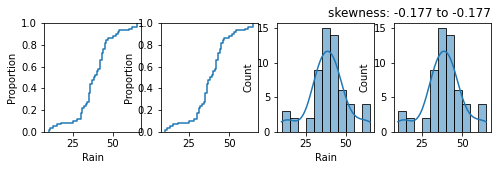

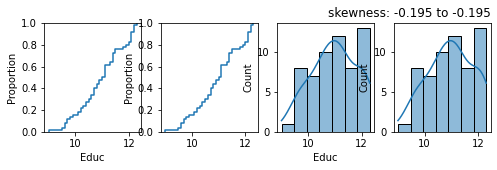

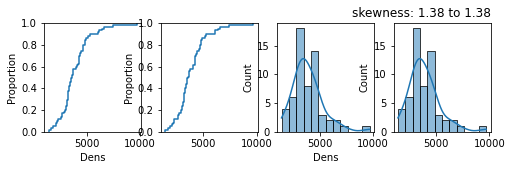

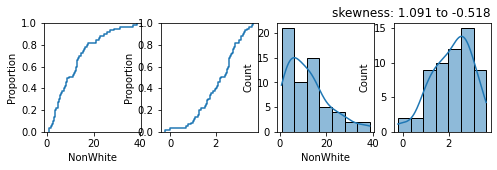

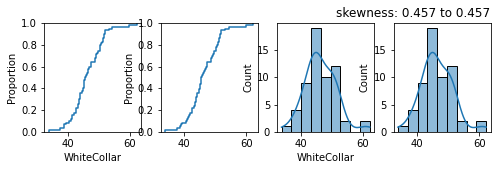

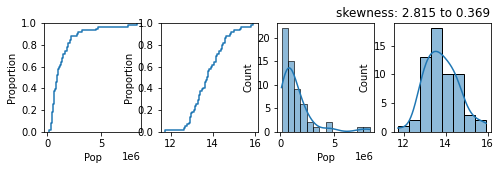

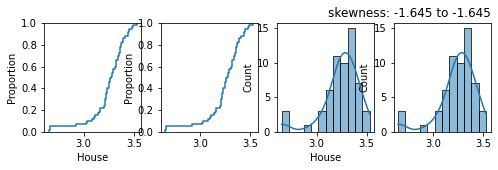

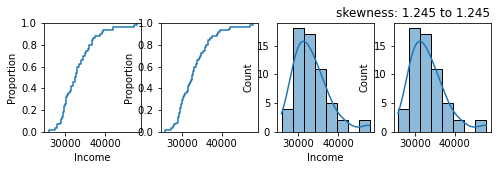

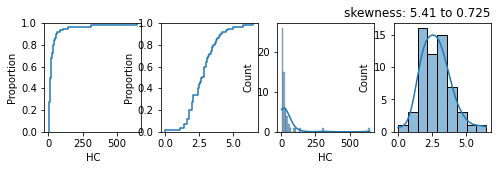

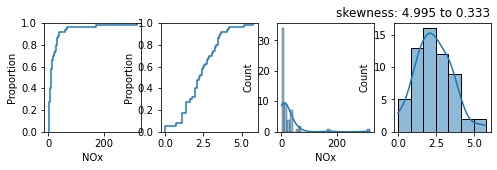

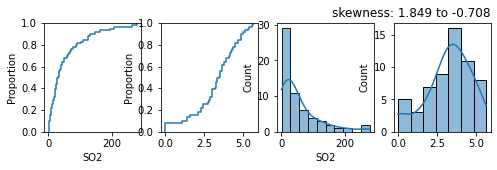

In [23]:
# Part (d-1)
## Take a look at the data and see if we can find some clues for what is going wrong. 
from sklearn.preprocessing import power_transform
from scipy.stats import skew
skewness=pd.DataFrame({'original': df_M.apply(lambda x: skew(x))})
# # trans_df_M=power_transform(df_M, method='box-cox')
trans_df_M = df_M.copy()
# column_need_trans = trans_df_M.columns[(np.abs(skewness)>=1.6).squeeze()]
column_need_trans = ['NonWhite', 'Pop', 'HC', 'NOx', 'SO2']
trans_df_M[column_need_trans] = trans_df_M[column_need_trans].apply(np.log)
skewness['transformed'] = skew(trans_df_M)
trans_df_M = np.array(trans_df_M)
for i in range(df_M.shape[1]):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(8, 2))
    sns.ecdfplot(df_M.iloc[:,i], label=df_M.columns[i], ax=ax1)
    sns.ecdfplot(trans_df_M[:,i], ax=ax2)
    sns.histplot(df_M.iloc[:,i], kde=True, ax=ax3)
    sns.histplot(trans_df_M[:,i], kde=True, ax=ax4)
    plt.title(f'skewness: {np.round(skewness.loc[df_M.columns[i]][0], 3)} to {np.round(skewness.loc[df_M.columns[i]][1],3)}', loc='right')
    plt.show()

In [24]:
# Part (d-2)
## Try your adjustment, your adjustment should allow the optimization to converge.
X_M = add_intercept(np.array(trans_df_M))
label_M = np.array(label_Mortality_df)
print(X_M.shape, label_M.shape)
precision = 1e-6
it_champ=1000
error_champ=10000000
step_size_champ=None
weights_champ=None
for step_size in np.linspace(0.0001, 0.001, 100):
    weights, it, min_error = train_model(X_M, label_M, step_size, precision, iterations=1000)
    if np.round(min_error,7) <= error_champ:
        error_champ = min_error
        weights_champ = weights
        if it<it_champ:
            it_champ = it
            step_size_champ = step_size
print(f'best step_size = {step_size_champ}, in {it_champ} iterations, predict error = {error_champ}')

(59, 15) (59, 1)
best step_size = None, in 1000 iterations, predict error = 10000000


In [75]:

X_M = add_intercept(trans_df_M)
label_M = np.array(label_Mortality_df)
print(X_M.shape, label_M.shape)
precision = 1e-6
it_champ=1000
error_champ=10000000
step_size_champ=None
weights_champ=None
for step_size in np.linspace(0.001, 0.01, 100):
    weights, it, min_error = train_model(X_M, label_M, step_size, precision, iterations=1000)
    if np.round(min_error,7) <= error_champ:
        error_champ = min_error
        weights_champ = weights
        if it<it_champ:
            it_champ = it
            step_size_champ = step_size
print(f'best step_size = {step_size_champ}, in {it_champ} iterations, predict error = {error_champ}')

(59, 15) (59, 1)
step_size = 0.001, end iterations = 0, error = 9.253247294264344e+23
step_size = 0.001090909090909091, end iterations = 0, error = 1.1012129024998863e+24
step_size = 0.0011818181818181819, end iterations = 0, error = 1.2923956994276037e+24
step_size = 0.0012727272727272728, end iterations = 0, error = 1.4988731202095873e+24
step_size = 0.0013636363636363637, end iterations = 0, error = 1.720645164845836e+24
step_size = 0.0014545454545454547, end iterations = 0, error = 1.957711833336351e+24
step_size = 0.0015454545454545456, end iterations = 0, error = 2.2100731256811313e+24
step_size = 0.0016363636363636363, end iterations = 0, error = 2.477729041880177e+24
step_size = 0.0017272727272727275, end iterations = 0, error = 2.760679581933488e+24
step_size = 0.0018181818181818182, end iterations = 0, error = 3.058924745841065e+24
step_size = 0.0019090909090909093, end iterations = 0, error = 3.372464533602909e+24
step_size = 0.002, end iterations = 0, error = 3.701298945219

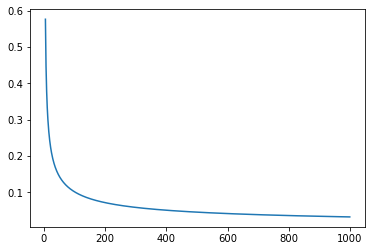

In [29]:
r=0.05
n=np.arange(5,1000)
t=np.sqrt((1-r**2)/(n-2))
sns.lineplot(x=n,y=t)
plt.show()

56.0

In [ ]:
fisher_exact

In [30]:
from scipy.stats import binom

In [32]:
NFIP_re = 125000/(125000+225000)
RCT_re = 350000/(400000+350000)
NFIP_re, RCT_re

(0.35714285714285715, 0.4666666666666667)

In [33]:
RCT_re*(125000+225000)

163333.33333333334

In [59]:
null = binom((125000+225000),NFIP_re)

In [84]:
t = RCT_re*(125000+225000)
p=1-null.cdf(t)
t,p

(163333.33333333334, 1.1102230246251565e-16)

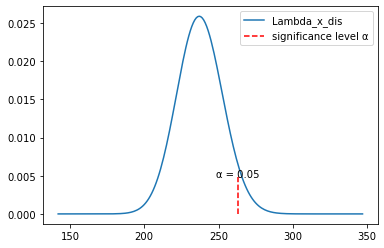

In [8]:
# visualization
## asymptotic distribution for Λ(𝑥)
# null = poisson(125000)
null = binom((725000+225000),25/100000)
x = np.arange(null.ppf(0.00000000001), null.ppf(0.99999999999))
y= null.pmf(x)
sns.lineplot(x=x, y=y, label='Lambda_x_dis')
## significance level=0.05
plt.vlines(x=null.ppf(0.95), ymin=0, ymax=np.mean(y), color='red', linestyle='--', label='significance level \u03B1')
plt.text(x=null.ppf(0.95), y=np.mean(y),s='\u03B1 = 0.05', ha='center')
# ## test_statistic
# plt.vlines(x=163333, ymin=0, ymax=np.max(y), color='orange', linestyle='-.', label='test_statistic')
# plt.text(x=163333, y=0, s='test_statistic', ha='center')
# ## p-value
# px=np.linspace(163333, null.ppf(0.9999), 100)
# py=null.pmf(px)
# plt.fill_between(x=px, y1=py, alpha=0.2, color='orange', label='p-value')
plt.legend()
plt.show()

In [ ]:
null = hypergeom()

<AxesSubplot:>

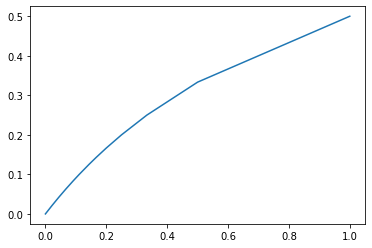

In [84]:
x= np.arange(1,10000)
y= (1/x)/((1/x)+1)
sns.lineplot(x=1/x,y=y)